[*********************100%***********************]  1 of 1 completed
Start Value: 10000
End Value: 8412.439482091635
Total Profit: -1587.560517908365


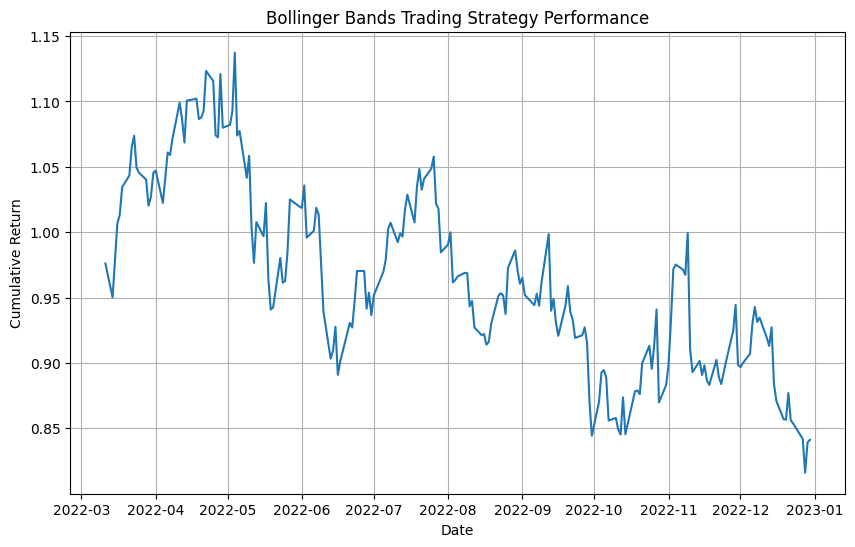

In [1]:
# Bollinger bands trading strategy
# yahoo finance data

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(df, window_size, num_std):
    rolling_mean = df['Close'].rolling(window=window_size).mean()
    rolling_std = df['Close'].rolling(window=window_size).std()
    df['UpperBand'] = rolling_mean + (rolling_std * num_std)
    df['LowerBand'] = rolling_mean - (rolling_std * num_std)
    return df

# Function to implement the Bollinger Bands trading strategy
def bollinger_bands_strategy(df, window_size, num_std):
    df = calculate_bollinger_bands(df, window_size, num_std)
    df['Position'] = np.nan

    # Buy when the price touches the lower Bollinger Band
    df.loc[df['Close'] < df['LowerBand'], 'Position'] = 1

    # Sell when the price touches the upper Bollinger Band
    df.loc[df['Close'] > df['UpperBand'], 'Position'] = -1

    # Forward fill the position column to represent holding the position until a new signal is generated
    df['Position'].fillna(method='ffill', inplace=True)

    # Calculate daily returns
    df['Return'] = df['Close'].pct_change()

    # Calculate strategy returns by multiplying daily returns with position (1 for long, -1 for short)
    df['StrategyReturn'] = df['Return'] * df['Position']

    return df

# Ticker symbol and date range for historical price data
ticker = 'AAPL'
start_date = '2022-01-01'
end_date = '2022-12-31'

# Fetch historical price data from Yahoo Finance
data = yf.download(ticker, start=start_date, end=end_date)

# Clean the DataFrame and keep only the 'Close' column
df = data[['Close']].copy()

# Set parameters for the strategy
window_size = 20  # Number of periods for rolling mean and standard deviation
num_std = 2  # Number of standard deviations for Bollinger Bands

# Apply the strategy and get the trading signals
df = bollinger_bands_strategy(df, window_size, num_std)

# Calculate cumulative returns
df['CumulativeReturn'] = (1 + df['StrategyReturn']).cumprod()

# Calculate strategy return and profit
start_value = 10000  # Starting capital
end_value = start_value * df['CumulativeReturn'].iloc[-1]
total_profit = end_value - start_value

print('Start Value:', start_value)
print('End Value:', end_value)
print('Total Profit:', total_profit)

# Plotting the strategy performance
plt.figure(figsize=(10, 6))
plt.plot(df['CumulativeReturn'])
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Bollinger Bands Trading Strategy Performance')
plt.grid(True)
plt.show()